# Hypergraph Generators

In [1]:
import sys
sys.path.append('../src/')

from Hypergraphs import EmptyHypergraph
# from utils import draw_hypergraph

import numpy as np

## ER_like_random_hypergraph 

In [6]:
sys.path.append('../scripts/')

from generators import p1_p2_ER_like_uncorrelated_hypergraph, ER_like_random_hypergraph

In [5]:
# setup
N = 1000

k1_k2_list = [(3, 1), (6, 2), (10, 3), (20, 6)]
(k1, k2) = k1_k2_list[2] # using (k1, k2) = (10, 3)

p1, p2 = p1_p2_ER_like_uncorrelated_hypergraph(k1,k2,N)
G, edges, triangles = ER_like_random_hypergraph(N,p1,p2)

g_edges = []
for edge in edges.tolist() + triangles.tolist():
    g_edges.append(tuple(edge))
print(f"g_edges: {g_edges[:5]}, ..., {g_edges[-5:]}")

print(f"p1 = {p1:.4f}")
print(f"p2 = {p2:.8f}")

g_edges: [(0, 143), (0, 268), (0, 296), (0, 600), (0, 989)], ..., [(711, 889, 971), (388, 429, 561), (237, 500, 565), (303, 375, 680), (85, 251, 667)]
p1 = 0.0100
p2 = 0.00000602


$p_1 = 0.01 > ln(N)/N \approx 0.0069 \text{ where } E[\text{isolated nodes}] \approx 1$ 

$G$ is connected almost surely..

In [6]:
max_pw_edges = N * (N - 1) / 2
max_ho_edges = N * (N - 1) * (N - 2) / 6

p1_est = []
p2_est = []
nsims = 1000
for _ in range(nsims):
    p1, p2 = p1_p2_ER_like_uncorrelated_hypergraph(k1,k2,N)
    G, edges, triangles = ER_like_random_hypergraph(N,p1,p2)

    p1_est.append(len(edges) / max_pw_edges)
    p2_est.append(len(triangles) / max_ho_edges)

not connected, but GC has order  999 and size 4898
not connected, but GC has order  999 and size 4923
not connected, but GC has order  998 and size 4923
not connected, but GC has order  999 and size 5120
not connected, but GC has order  999 and size 5013
not connected, but GC has order  999 and size 5080
not connected, but GC has order  999 and size 5028
not connected, but GC has order  999 and size 4945
not connected, but GC has order  999 and size 5060
not connected, but GC has order  998 and size 4981


KeyboardInterrupt: 

In [5]:
print(f"p1_est = {np.mean(p1_est):.4f}")
print(f"p2_est = {np.mean(p2_est):.8f}")

p1_est = 0.0100
p2_est = 0.00000602


In [6]:
# let's check the average PW, HO degrees
k1, k2 # actual target degrees

(10, 3)

In [7]:
g_type = "random_ER"
g = EmptyHypergraph(N)
g.name = g_type
g.set_edges(g_edges)

# for node i: 
#   * `neighbors(i, 1)` gives all 2-node nbs of i
#   * `neighbors(i, 2)` gives all 3-node nbs of i


In [8]:
np.mean([len(g.neighbors(i, 1)) for i in list(g.nodes.keys())])

np.float64(9.778)

In [9]:
np.mean([len(g.neighbors(i, 2)) for i in list(g.nodes.keys())])

np.float64(3.069)

In [10]:
k1_est = []
k2_est = []

nsims = 1000
for _ in range(nsims):
    p1, p2 = p1_p2_ER_like_uncorrelated_hypergraph(k1,k2,N)
    G, edges, triangles = ER_like_random_hypergraph(N,p1,p2)

    g_type = "random_ER"
    g = EmptyHypergraph(N)
    g.name = g_type
    g.set_edges(g_edges)

    k1_sim = np.mean([len(g.neighbors(i, 1)) for i in list(g.nodes.keys())])
    k2_sim = np.mean([len(g.neighbors(i, 2)) for i in list(g.nodes.keys())])

    k1_est.append(k1_sim)
    k2_est.append(k2_sim)
    

not connected, but GC has order  999 and size 4957
not connected, but GC has order  999 and size 4980
not connected, but GC has order  999 and size 4983
not connected, but GC has order  999 and size 4923
not connected, but GC has order  999 and size 4947
not connected, but GC has order  999 and size 4889
not connected, but GC has order  999 and size 4931
not connected, but GC has order  999 and size 5011
not connected, but GC has order  999 and size 4917
not connected, but GC has order  999 and size 4974
not connected, but GC has order  999 and size 4925
not connected, but GC has order  999 and size 4827
not connected, but GC has order  999 and size 4959
not connected, but GC has order  999 and size 5174
not connected, but GC has order  999 and size 4870
not connected, but GC has order  999 and size 5051
not connected, but GC has order  999 and size 4975
not connected, but GC has order  999 and size 5058
not connected, but GC has order  999 and size 4911
not connected, but GC has order

In [11]:
np.mean(k1_est), np.mean(k2_est)

(np.float64(9.778000000000002), np.float64(3.0690000000000004))

In [12]:
k1, k2 # actual target degrees

(10, 3)

## Configuration model (negative-binomial distributed) 

In [7]:
from generators import configuration_model_edges, configuration_model_triangles
from scipy.stats import nbinom

import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# setup
N=2000

k1, k2 = 20, 6 # TODO: set k1, k2 = ?

var = 300    #640#602
r = (k1**2)/(var - k1)
p = k1/var

for aaa in range(1000):
    degrees = nbinom.rvs(r, p, size=N)+1
    if sum(degrees)%2 == 0:
        break

print('Edges set generated')

edges = configuration_model_edges(degrees)

### generate triangles_list
var = 100    #650#620
r = (k2**2)/(var - k1)
p = k2/var

for _ in range(1000):
    node_triangle_counts = nbinom.rvs(r, p, size=N) + 1
    degrees_ho_stubs = node_triangle_counts# * 2    # <- this part 
    if np.sum(node_triangle_counts) % 3 == 0:
        print('miao')
        break
triangles_list = configuration_model_triangles(degrees_ho_stubs)

g_edges = []
for edge in edges.tolist() + triangles_list.tolist():
    g_edges.append(tuple(edge))
print(f"g_edges: {g_edges[:5]}, ..., {g_edges[-5:]}")

g = EmptyHypergraph(N)
g.name = "NegBinom"
g.set_edges(g_edges)
g.print()

Edges set generated
g_edges: [(969, 1154), (735, 1027), (903, 1615), (372, 738), (537, 1889)], ..., [(6, 1269, 1321), (226, 1108, 1986), (851, 1655, 1788), (443, 457, 1955), (804, 1486, 1629)]
	NegBinom on 2000 nodes with 25983 edges.



Figure saved to: ../figures/hypergraphs/neg_binom_single_instance_degrees_N2000_k1_20_k2_6.pdf


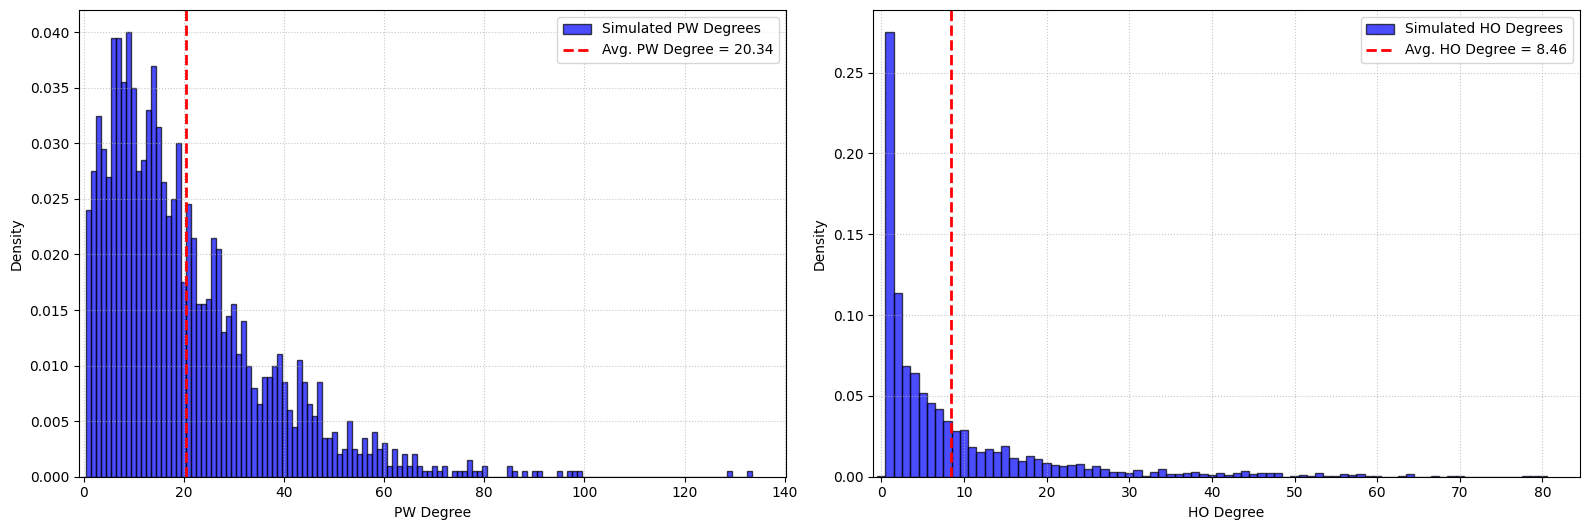

(np.float64(265.69197499999996), np.float64(124.876151))

In [15]:
# PW degrees
sim_degrees_pw = np.zeros(N, dtype=int)
for node_idx in range(N):
    sim_degrees_pw[node_idx] = len(g.neighbors(node_idx, 1))

# HO degrees: number of 3-node edges (triangles) a node is part of
sim_degrees_ho = np.zeros(N, dtype=int)
for node_idx in range(N):
    sim_degrees_ho[node_idx] = len(g.neighbors(node_idx, 2))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

max_degree_pw = np.max(sim_degrees_pw) if len(sim_degrees_pw) > 0 else 0
var_degree_pw = np.var(sim_degrees_pw) if len(sim_degrees_pw) > 0 else 0
avg_degree_pw = np.mean(sim_degrees_pw) if len(sim_degrees_pw) > 0 else 0
bins_pw = np.arange(-0.5, max_degree_pw + 1.5, 1)

# PW degrees
axes[0].hist(sim_degrees_pw, bins=bins_pw, density=True,
             alpha=0.7, label='Simulated PW Degrees', color='blue', ec='black')

k_values_pw = np.arange(0, max_degree_pw + 1)
# axes[0].plot(k_values_pw, pmf_pw, 'o-', ms=4, color='black')

axes[0].axvline(avg_degree_pw, color="red", linestyle='--', lw=2,
                label=f"Avg. PW Degree = {avg_degree_pw:.2f}")

axes[0].set_xlabel('PW Degree')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, linestyle=':', alpha=0.7)
axes[0].set_xlim(left=-1)

# HO degrees
max_degree_ho = np.max(sim_degrees_ho) if len(sim_degrees_ho) > 0 else 0
var_degree_ho = np.var(sim_degrees_ho) if len(sim_degrees_ho) > 0 else 0
avg_degree_ho = np.mean(sim_degrees_ho) if len(sim_degrees_ho) > 0 else 0
bins_ho = np.arange(-0.5, max_degree_ho + 1.5, 1)

axes[1].hist(sim_degrees_ho, bins=bins_ho, density=True,
             alpha=0.7, label='Simulated HO Degrees', color='blue', ec='black')

k_values_ho = np.arange(0, max_degree_ho + 1)

# # PMF for the "number of triangles a node is in"
# pmf_ho = nbinom.pmf(k_values_ho -1, r_ho_plot, p_ho_plot) # -1 because +1 was added in generation
# axes[1].plot(k_values_ho, pmf_ho, 'o-', ms=4, color='black',
#              label=f'NegBinom PMF (r={r_ho_plot:.2f}, p={p_ho_plot:.2f}, shifted by -1)')

# axes[1].axvline(avg_degree_ho, color="red", linestyle='--', lw=2,
#                 label=f"Avg. HO Degree = {avg_degree_ho:.2f}")
# axes[1].set_title(f'HO Degrees (Target Avg={k2_avg_target:.1f}, Var={var2_target:.1f})')
# axes[1].set_xlabel('HO Degree (k_ho)')
# axes[1].set_ylabel('Density')


axes[1].axvline(avg_degree_ho, color="red", linestyle='--', lw=2,
                label=f"Avg. HO Degree = {avg_degree_ho:.2f}")

axes[1].set_xlabel('HO Degree')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True, linestyle=':', alpha=0.7)
axes[1].set_xlim(left=-1)

plt.tight_layout(rect=[0, 0.03, 1, 0.93])

name = f"neg_binom_single_instance_degrees_N{N}_k1_{k1}_k2_{k2}"
save_dir = "../figures/hypergraphs/"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, f"{name}.pdf")
fig.savefig(save_path, format="pdf", bbox_inches="tight")
print(f"Figure saved to: {save_path}")

plt.show()

var_degree_pw, var_degree_ho

In [31]:
def generate_neg_binom_hypergraph(N, k_pw_avg, var_pw, k_ho_avg, var_ho):
    """
    Generates a hypergraph with pairwise and higher-order degrees drawn
    from Negative Binomial distributions.
    """
    g = EmptyHypergraph(N)
    g.name = "NegBinom"
    all_edges = []

    # PW
    p_pw = k_pw_avg / var_pw
    r_pw = k_pw_avg**2 / (var_pw - k_pw_avg)
    for _ in range(1000):
        degrees_pw = nbinom.rvs(r_pw, p_pw, size=N) + 1
        if np.sum(degrees_pw) % 2 == 0:
            break
    edges_pw_list = configuration_model_edges(degrees_pw)
    all_edges.extend(edges_pw_list)

    # HO
    p_ho = k_ho_avg / var_ho
    r_ho = k_ho_avg**2 / (var_ho - k_ho_avg)

    for _ in range(1000):
        node_triangle_counts = nbinom.rvs(r_ho, p_ho, size=N) + 1
        degrees_ho_stubs = node_triangle_counts * 2
        if np.sum(degrees_ho_stubs) % 3 == 0:
            break
    
    triangles_list = configuration_model_triangles(degrees_ho_stubs)
    all_edges.extend(triangles_list)
    g.set_edges(all_edges)
    
    return g, (r_pw, p_pw), (r_ho, p_ho)

## Check degree distributions

In [23]:
N = 2000
nsims = 10

k1_avg_target = 6.0
var1_target = 100.0

k2_avg_target = 3.0
var2_target = 100.0

all_sim_degrees_pw_flat = []
all_sim_degrees_ho_flat = []

params_pw_actual_list = []
params_ho_actual_list = []

for i in range(nsims):
    g_sim, params_pw_actual, params_ho_actual = generate_neg_binom_hypergraph(
        N, k1_avg_target, var1_target, k2_avg_target, var2_target)
    params_pw_actual_list.append(params_pw_actual)
    params_ho_actual_list.append(params_ho_actual)

    # PW degrees
    sim_degrees_pw = np.zeros(N, dtype=int)
    for node_idx in range(N):
        sim_degrees_pw[node_idx] = len(g_sim.neighbors(node_idx, 1))
    all_sim_degrees_pw_flat.extend(sim_degrees_pw)
    
    # HO degrees: number of 3-node edges, a node is part of
    sim_degrees_ho = np.zeros(N, dtype=int)
    for node_idx in range(N):
        sim_degrees_ho[node_idx] = len(g_sim.neighbors(node_idx, 2))
    all_sim_degrees_ho_flat.extend(sim_degrees_ho)

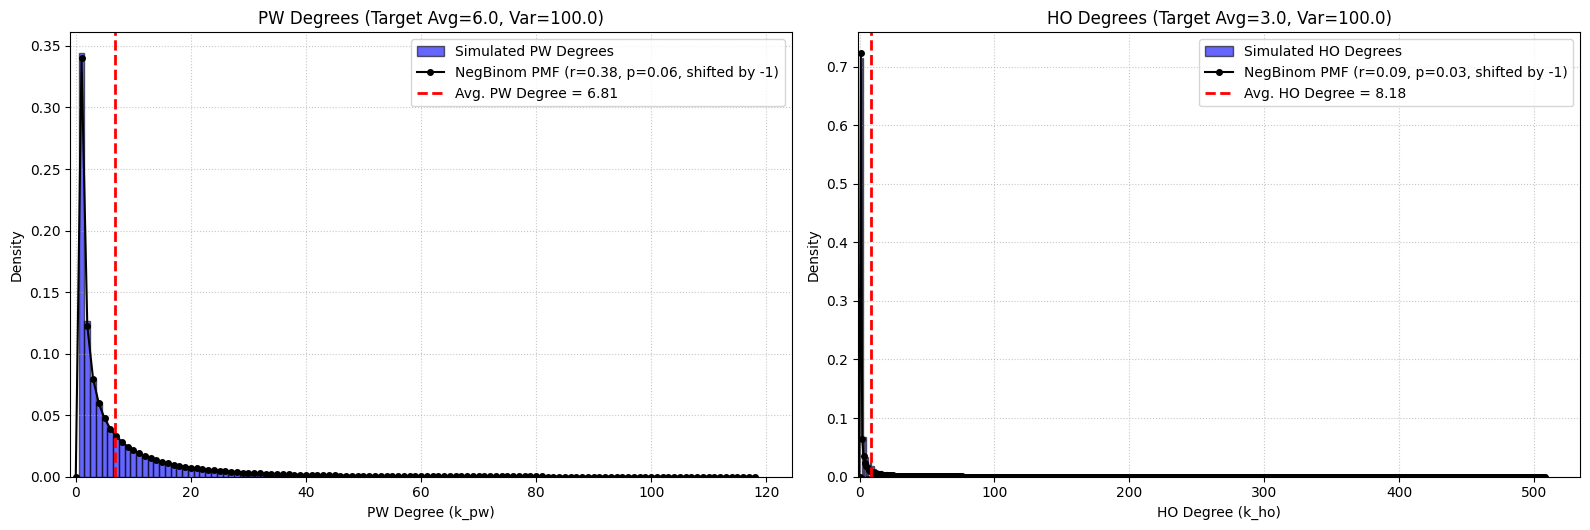

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PW degree distribution
max_degree_pw = np.max(all_sim_degrees_pw_flat)
avg_degree_pw = np.mean(all_sim_degrees_pw_flat)
bins_pw = np.arange(-0.5, max_degree_pw + 1.5, 1)

axes[0].hist(all_sim_degrees_pw_flat, bins=bins_pw, density=True,
             alpha=0.6, label='Simulated PW Degrees', color='blue', ec='black')

r_pw_plot, p_pw_plot = params_pw_actual_list[0]


k_values_pw = np.arange(0, max_degree_pw + 1)
pmf_pw = nbinom.pmf(k_values_pw -1 , r_pw_plot, p_pw_plot) # -1 if +1 was added in generation
axes[0].plot(k_values_pw, pmf_pw, 'o-', ms=4, color='black',
             label=f'NegBinom PMF (r={r_pw_plot:.2f}, p={p_pw_plot:.2f}, shifted by -1)')


axes[0].axvline(avg_degree_pw, color="red", linestyle='--', lw=2,
                label=f"Avg. PW Degree = {avg_degree_pw:.2f}")
axes[0].set_title(f'PW Degrees (Target Avg={k1_avg_target:.1f}, Var={var1_target:.1f})')
axes[0].set_xlabel('PW Degree (k_pw)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, linestyle=':', alpha=0.7)
axes[0].set_xlim(left=-1)

# HO degree distribution
max_degree_ho = np.max(all_sim_degrees_ho_flat)
avg_degree_ho = np.mean(all_sim_degrees_ho_flat)
bins_ho = np.arange(-0.5, max_degree_ho + 1.5, 1)

axes[1].hist(all_sim_degrees_ho_flat, bins=bins_ho, density=True,
             alpha=0.6, label='Simulated HO Degrees', color='blue', ec='black')

r_ho_plot, p_ho_plot = params_ho_actual_list[0]

k_values_ho = np.arange(0, max_degree_ho + 1)

# PMF for the "number of triangles a node is in"
pmf_ho = nbinom.pmf(k_values_ho -1, r_ho_plot, p_ho_plot) # -1 because +1 was added in generation
axes[1].plot(k_values_ho, pmf_ho, 'o-', ms=4, color='black',
             label=f'NegBinom PMF (r={r_ho_plot:.2f}, p={p_ho_plot:.2f}, shifted by -1)')

axes[1].axvline(avg_degree_ho, color="red", linestyle='--', lw=2,
                label=f"Avg. HO Degree = {avg_degree_ho:.2f}")
axes[1].set_title(f'HO Degrees (Target Avg={k2_avg_target:.1f}, Var={var2_target:.1f})')
axes[1].set_xlabel('HO Degree (k_ho)')
axes[1].set_ylabel('Density')

axes[1].legend()
axes[1].grid(True, linestyle=':', alpha=0.7)

axes[1].set_xlim(left=-1)


plt.tight_layout(rect=[0, 0.03, 1, 0.93])

plt.show()

In [ ]:
name = f"neg_binom_generator_degrees_N={N}"
save_dir = "../figures/hypergraphs/"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, f"{name}.pdf")
fig.savefig(save_path, format="pdf", bbox_inches="tight")
print(f"Figure saved to: {save_path}")

Figure saved to: ../figures/hypergraphs/neg_binom_generator_degrees_N=2000.pdf
